In [1]:
import pandas as pd

#filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print("No. of rows:", train.shape[0])

No. of rows: 159571


In [5]:
hate_tag_count=train.iloc[:,2:].sum()
hate_tag_count.index

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x23b9c591fc0>,
 [Text(-1.0776686019265131, 0.22052297935080262, 'toxic'),
  Text(-0.30956256499280466, -1.1593838960219673, 'severe_toxic'),
  Text(0.6552469411842468, -0.88354481837012, 'obscene'),
  Text(1.0901922063181555, -0.14656381982997196, 'threat'),
  Text(0.8989507343533251, 0.6339460365091164, 'insult'),
  Text(0.13797212793674427, 1.0913128295372536, 'identity_hate')],
 [Text(-0.5878192374144616, 0.12028526146407414, '43.6%'),
  Text(-0.18057816291246936, -0.6763072726794808, '4.5%'),
  Text(0.3574074224641346, -0.48193353729279265, '24.1%'),
  Text(0.5946502943553574, -0.07994390172543923, '1.4%'),
  Text(0.49033676419272265, 0.3457887471867907, '22.4%'),
  Text(0.07525752432913323, 0.5952615433839564, '4.0%')])

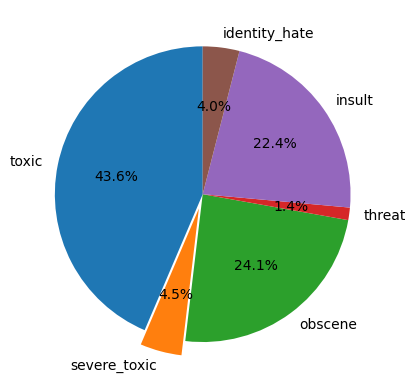

In [7]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
sizes = hate_tag_count.values
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90) # Equal aspect ratio ensures that pie is drawn as a circle.


Text(0.5, 0, 'Tag type')

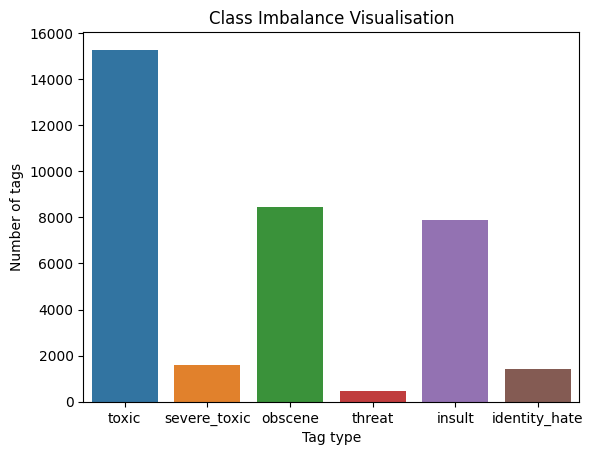

In [8]:
sns.barplot(x=hate_tag_count.index, y=hate_tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')

In [9]:
#Add an additional column for clean comments
train['clean']=(train.iloc[:,2:].sum(axis=1)==0).astype(int)

In [10]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [11]:
tag_count=train.iloc[:,2:].sum()
tag_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

In [12]:
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total hate tags =",hate_tag_count.sum())
print("Total hate comments =",len(train)-train['clean'].sum())

Total comments =  159571
Total clean comments =  143346
Total hate tags = 35098
Total hate comments = 16225


In [13]:
#Check for missing values in Train dataset
nulls=train.isnull().sum().sum()
print('No. of null values =', nulls)

No. of null values = 0


Text(0.5, 0, 'Tag type')

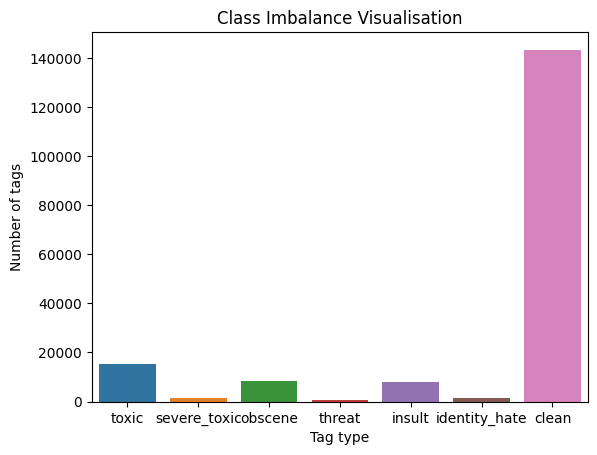

In [14]:
#plot the bar plot of new data

sns.barplot(x=tag_count.index, y=tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')


In [15]:
multi_tag=train.iloc[:,2:].sum(axis=1).value_counts()
multi_tag

1    149706
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

<Axes: >

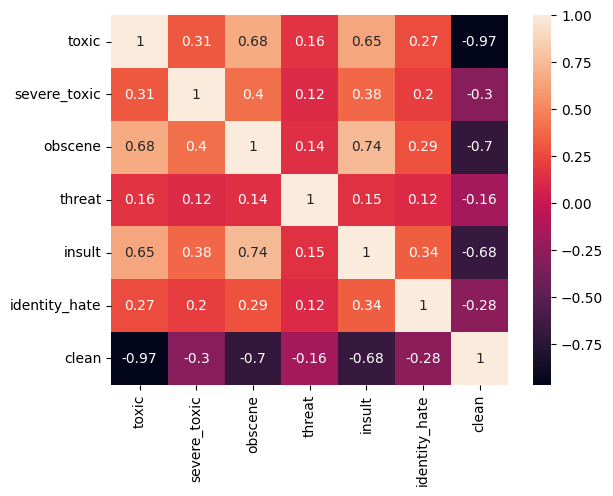

In [17]:
corr=train.iloc[:,2:].corr()
sns.heatmap(corr,annot=True)

In [18]:
print("identity_hate:")
print(train[train.identity_hate==1].iloc[28,1])

identity_hate:
"
Actually I am fully Arabic and Islamic and the correct spelling unlike how you stupid christians have been spelling it is ""Mou'ammar Al Qadhdhaffy"". But you are all too racist and white and stupid too accept that124.180.159.192  "


In [19]:
import re
df=train.copy()
df['count_sentences']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
df['count_words']=df["comment_text"].apply(lambda x: len(str(x).split()))
df['count_unique_words']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

In [20]:
df_counts=df[['count_sentences','count_words','count_unique_words','count_letters']]

In [21]:
df_counts.describe().round(2)

,count_sentences,count_words,count_unique_words,count_letters
count,159571.00,159571.00,159571.00,159571.00
mean,3.52,67.27,48.10,394.07
std,5.96,99.23,54.44,590.72
min,1.00,1.00,1.00,6.00
25%,1.00,17.00,16.00,96.00
50%,2.00,36.00,31.00,205.00
75%,3.00,75.00,59.00,435.00
max,313.00,1411.00,816.00,5000.00


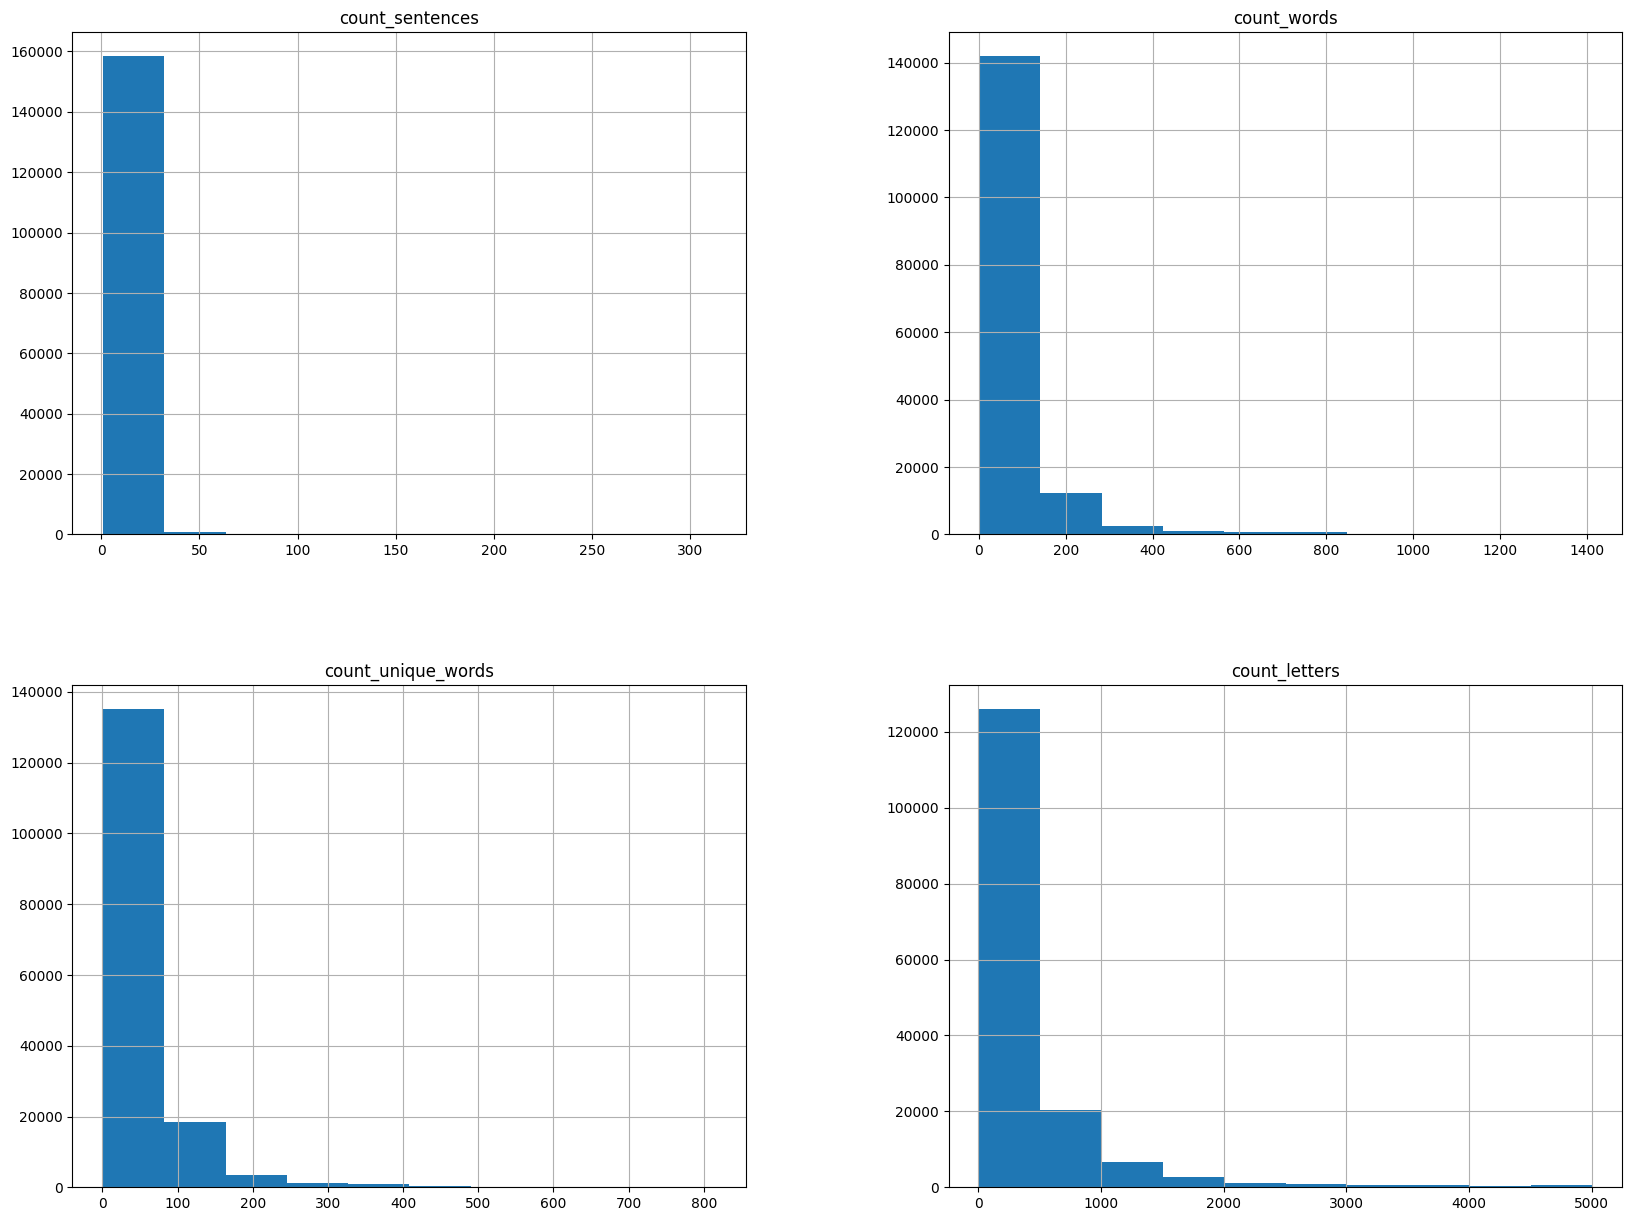

In [22]:
ax=df_counts.hist(figsize=(20,15))

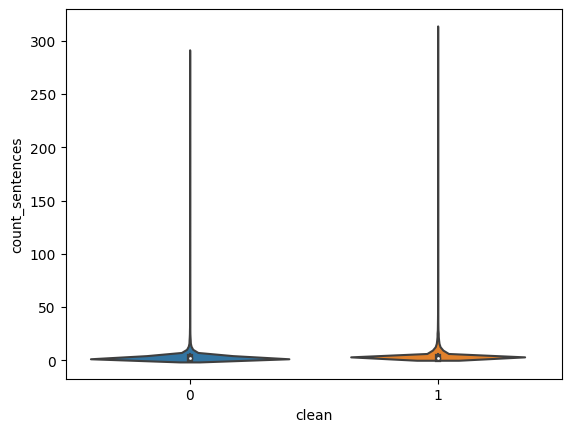

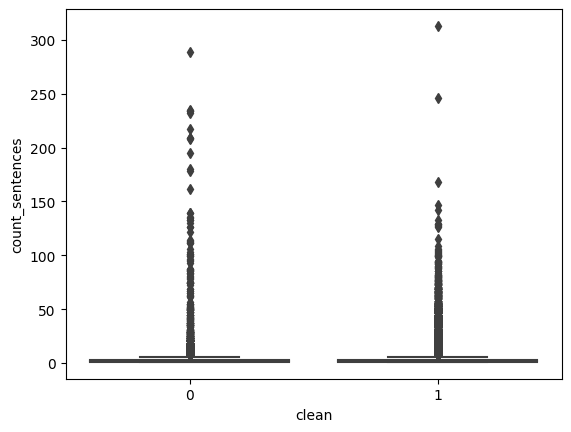

In [23]:
sns.violinplot(y='count_sentences',x='clean', data=df)
plt.show()
sns.boxplot(y='count_sentences',x='clean', data=df)
plt.show()


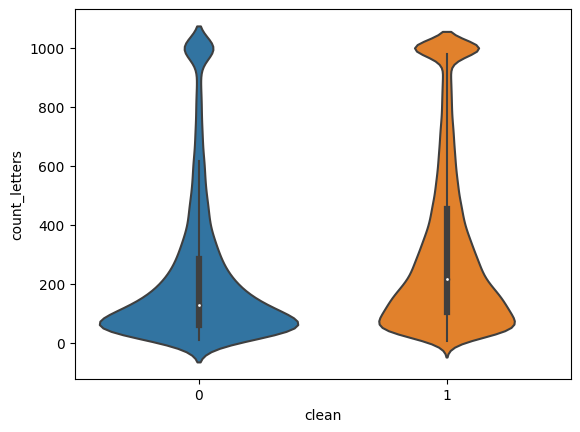

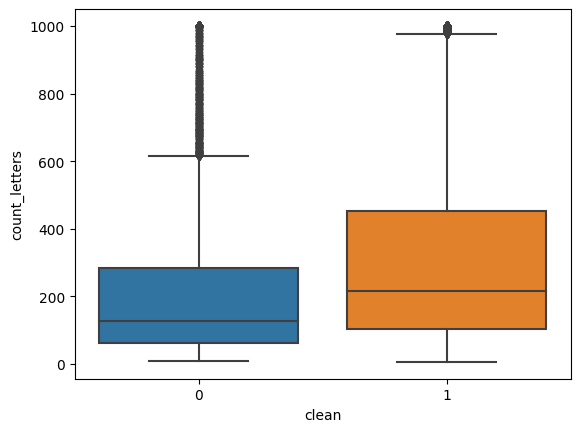

In [26]:
df1=df.copy()
df1['count_letters'].loc[df1['count_letters']>1000]=1000
sns.violinplot(y='count_letters',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_letters',x='clean', data=df1)
plt.show()


<Axes: >

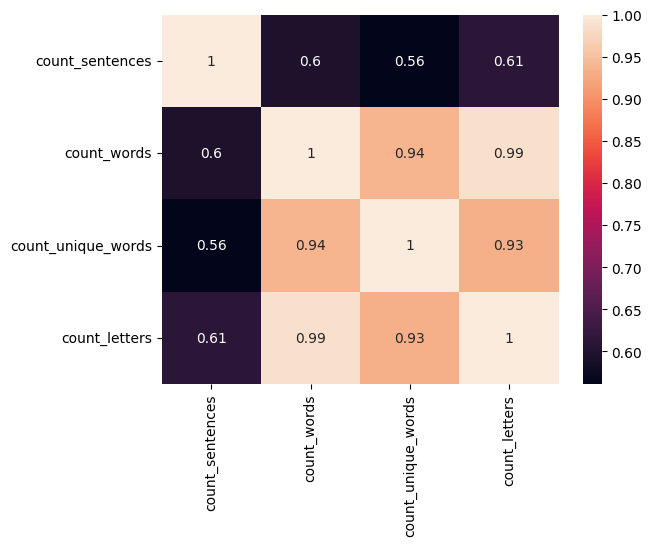

In [27]:
corr=df.iloc[:,-4:].corr()
sns.heatmap(corr,annot=True)